## Figures

* Alibaba foreknowledge vs requested social welfare with a range of results data ranges

## Model sizes
* 10 Tasks, 2 Servers (Elastic, Non elastic and Greedy)
* 15 Tasks, 3 Servers (Elastic, Non elastic and Greedy)
* 25 Tasks, 5 Servers (Non elastic and Greedy)
* 50 Tasks, 10 Servers (Greedy)
* 75 Tasks, 15 Servers (Greedy)

### P-test and paired t-test

In [2]:
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import sys
import re
sys.path.append(os.path.join(os.getcwd(), ".."))

from src.extra.io import save_plot

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [3]:
def collect_results(filename, col, algos):
    with open(filename) as file:
        results = json.load(file)
        return [[model_results[algo][col] for model_results in results if algo in model_results] 
                for algo in algos]

In [4]:
greedy_algo = 'Greedy Utility * deadline / Sum, Sum, Percent Sum'

In [5]:
def greedy_performance(folder, filenames, algos, algo_names, col='social welfare percent'):
    fig, axs = plt.subplots(1, len(filenames), figsize=(12, 3))
    for ax, filename in zip(axs, filenames):
        print(f'{folder}/{filename}')
        model_size_result = collect_results(f'{folder}/{filename}', col, algos)
        ax.boxplot(model_size_result, vert=False, widths=0.9)
        ax.set_xlabel('Social Welfare Percentage')
        ax.set_yticklabels([''] * len(algos))
        model_size = re.search(r't\d+_s\d+', filename).group(0)
        model_size = model_size.replace('t', '').replace('_s', ' Tasks, ') + ' Servers'
        ax.set_title(model_size)

    axs[0].set_yticklabels(algo_names)
    fig.tight_layout()
    return fig, axs

In [6]:
def greedy_resource_usage(folder, filenames, algos, algo_names):
    fig, axs = plt.subplots(len(filenames), 3, figsize=(14, 3*len(filenames)))
    for pos, filename in enumerate(filenames):
        print(filename)
        with open(f'{folder}/{filename}') as file:
            data = json.load(file)

        algo_resource_usage = {algo: {'storage': [], 'compute': [], 'bandwidth': []} for algo in algos}
        for result in data:
            for algo in algos:
                if algo in result:
                    algo_resource_usage[algo]['storage'] += list(result[algo]['server storage usage'].values())
                    algo_resource_usage[algo]['compute'] += list(result[algo]['server compute usage'].values())
                    algo_resource_usage[algo]['bandwidth'] += list(result[algo]['server bandwidth usage'].values())

        for ax, (algo, resource_usage), name in zip(axs[pos], algo_resource_usage.items(), algo_names):
            ax.set_title(name)
            for resource, usage in resource_usage.items():
                ax.hist(usage, label=resource)
            ax.legend()
        axs[pos, 0].set_ylabel(filename[24:30].replace('t', 'tasks=').replace('_s', ', servers='))
    
    plt.tight_layout()
    return fig, axs

## Alibaba foreknowledge vs requested social welfare with a range of results data ranges

In [7]:
algo_names = ['Non-elastic\nOptimal', 'Greedy\nAlgorithm', 'Elastic\nOptimal']

### Foreknowledge

../data/alibaba/foreknowledge_alibaba_r_t10_s2_dt05-31_14-35-19.json
../data/alibaba/foreknowledge_alibaba_r_t10_s2_dt06-01_11-10-40.json
../data/alibaba/foreknowledge_alibaba_r_t15_s3_dt05-31_14-40-12.json
../data/alibaba/foreknowledge_alibaba_r_t15_s3_dt06-01_11-10-40.json
../data/alibaba/foreknowledge_alibaba_r_t20_s4_dt05-31_14-43-24.json
../data/alibaba/foreknowledge_alibaba_r_t20_s4_dt06-01_11-10-40.json
Save file location: figs/eps/alibaba_foreknowledge.eps
Save file location: figs/png/alibaba_foreknowledge.png
Save file location: figs/pdf/alibaba_foreknowledge.pdf


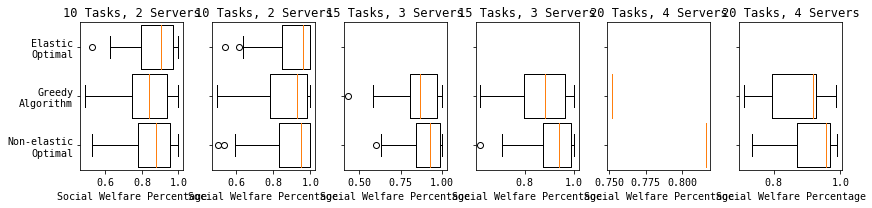

In [8]:
algos = ['foreknowledge fixed optimal', f'foreknowledge {greedy_algo}', 'foreknowledge flexible optimal']
greedy_performance('../data/alibaba', sorted(os.listdir('../data/alibaba')), algos, algo_names)
save_plot('alibaba_foreknowledge')

foreknowledge_alibaba_r_t10_s2_dt05-31_14-35-19.json
foreknowledge_alibaba_r_t10_s2_dt06-01_11-10-40.json
foreknowledge_alibaba_r_t15_s3_dt05-31_14-40-12.json
foreknowledge_alibaba_r_t15_s3_dt06-01_11-10-40.json
foreknowledge_alibaba_r_t20_s4_dt05-31_14-43-24.json
foreknowledge_alibaba_r_t20_s4_dt06-01_11-10-40.json


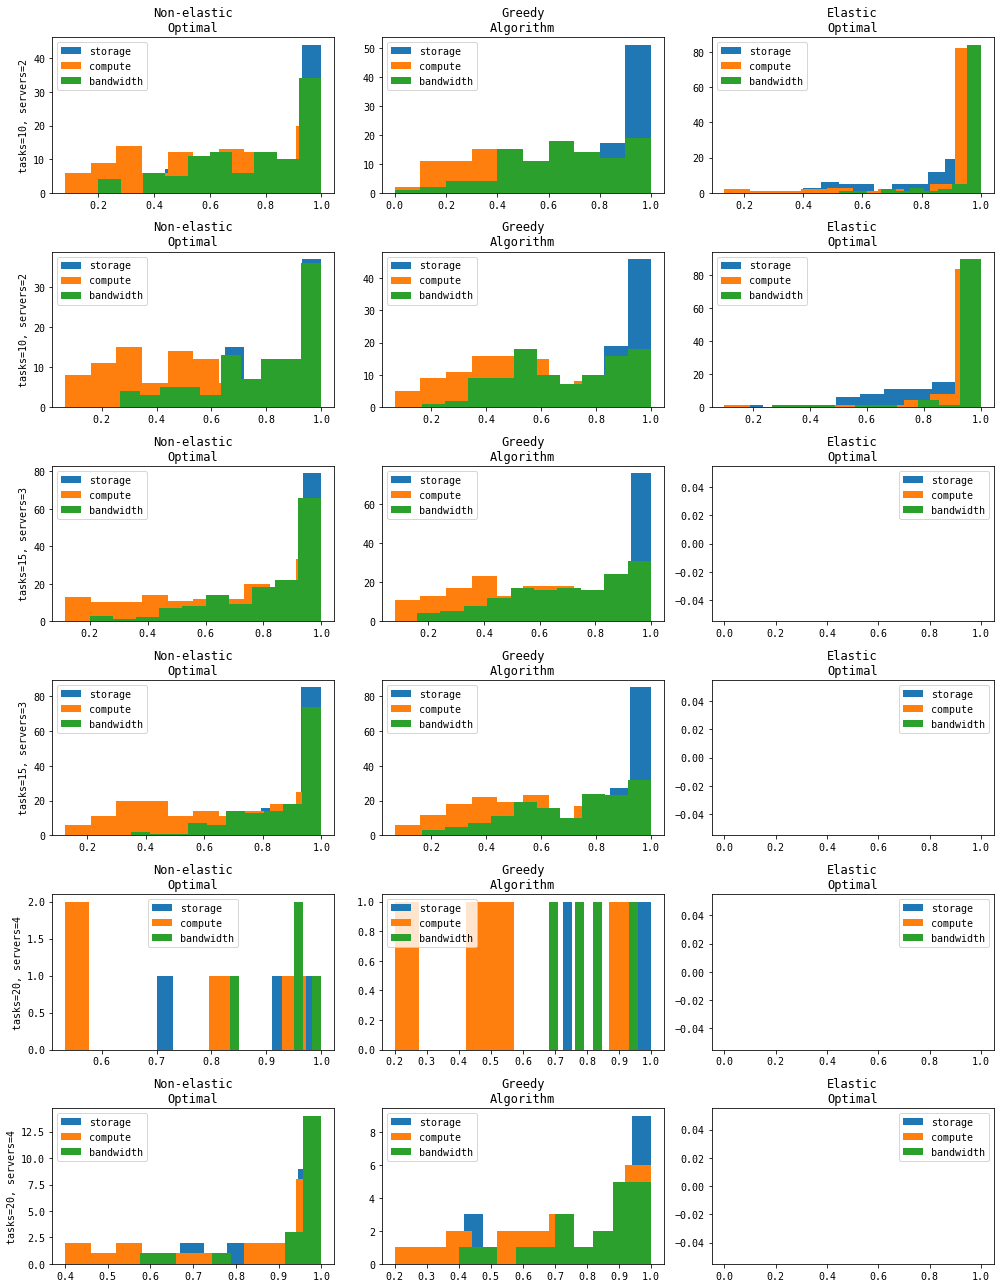

In [9]:
_ = greedy_resource_usage('../data/alibaba', sorted(os.listdir('../data/alibaba')), algos, algo_names)

### Requested

../data/alibaba/foreknowledge_alibaba_r_t10_s2_dt05-31_14-35-19.json
../data/alibaba/foreknowledge_alibaba_r_t10_s2_dt06-01_11-10-40.json
../data/alibaba/foreknowledge_alibaba_r_t15_s3_dt05-31_14-40-12.json
../data/alibaba/foreknowledge_alibaba_r_t15_s3_dt06-01_11-10-40.json
../data/alibaba/foreknowledge_alibaba_r_t20_s4_dt05-31_14-43-24.json
../data/alibaba/foreknowledge_alibaba_r_t20_s4_dt06-01_11-10-40.json
Save file location: figs/eps/alibaba_requested.eps
Save file location: figs/png/alibaba_requested.png
Save file location: figs/pdf/alibaba_requested.pdf


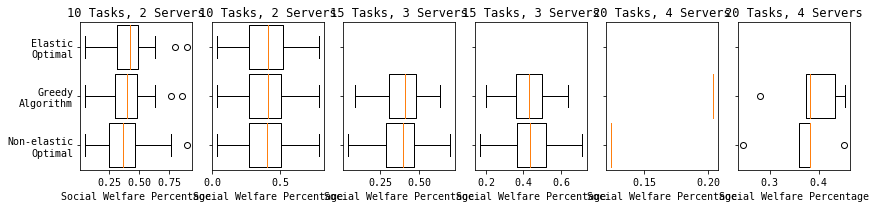

In [10]:
algos = ['requested fixed optimal', f'requested {greedy_algo}', 'requested flexible optimal']
greedy_performance('../data/alibaba', sorted(os.listdir('../data/alibaba')), algos, algo_names)
save_plot('alibaba_requested')

foreknowledge_alibaba_r_t10_s2_dt05-31_14-35-19.json
foreknowledge_alibaba_r_t10_s2_dt06-01_11-10-40.json
foreknowledge_alibaba_r_t15_s3_dt05-31_14-40-12.json
foreknowledge_alibaba_r_t15_s3_dt06-01_11-10-40.json
foreknowledge_alibaba_r_t20_s4_dt05-31_14-43-24.json
foreknowledge_alibaba_r_t20_s4_dt06-01_11-10-40.json


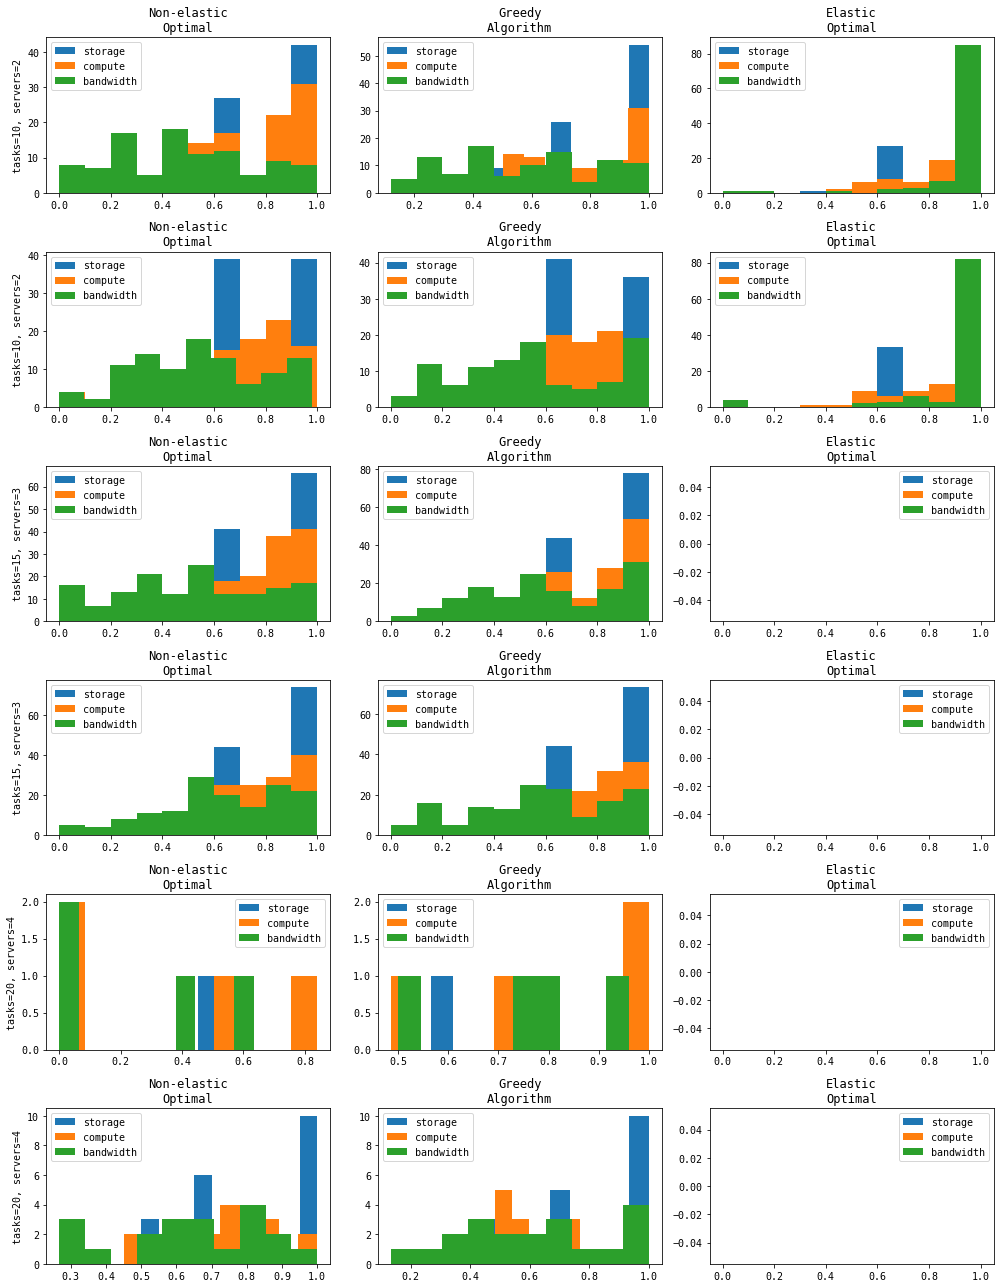

In [11]:
_ = greedy_resource_usage('../data/alibaba', sorted(os.listdir('../data/alibaba')), algos, algo_names)

## Synthetic greedy resource ratio

In [22]:
algorithms = [('Greedy Algorithm', f' {greedy_algo}'), ('Fixed Resource Allocation', 'Fixed Optimal')]
ratios = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)

ratio_resource_filename = os.listdir('../data/resource_ratio')[1]
with open(f'../data/resource_ratio/{ratio_resource_filename}') as file:
    ratio_resource_data = json.load(file)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Save file location: figs/eps/resource_ratio_social_welfare.eps
Save file location: figs/png/resource_ratio_social_welfare.png
Save file location: figs/pdf/resource_ratio_social_welfare.pdf


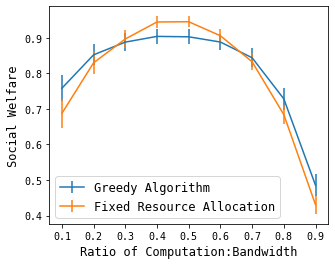

In [43]:
fig, ax = plt.subplots(figsize=(5, 4))
for name, algo in algorithms:
    social_welfares = [[model_data[f'ratio {ratio}'][algo]['social welfare percent'] 
                        for model_data in ratio_resource_data] for ratio in ratios]
    error = 1.96 * np.std(social_welfares, axis=1) / np.sqrt(len(ratio_resource_data))
    ax.errorbar(x=ratios, y=np.mean(social_welfares, axis=1), yerr=error, label=name)

ax.set_ylabel('Social Welfare', fontsize=12)
ax.set_xlabel('Ratio of Computation:Bandwidth', fontsize=12)

plt.legend(fontsize=12)
save_plot('resource_ratio_social_welfare')

Save file location: figs/eps/resource_ratio_server_usage.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Save file location: figs/png/resource_ratio_server_usage.png
Save file location: figs/pdf/resource_ratio_server_usage.pdf


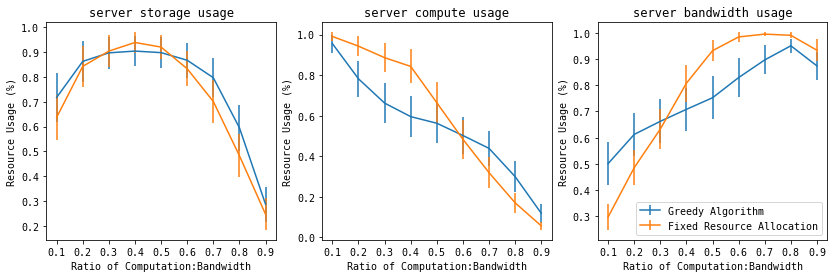

In [45]:
flatten = lambda t: [item for sublist in t for item in sublist]

fig, axs = plt.subplots(1, 3, figsize=(14, 4))
for ax, resource in zip(axs, ['server storage usage', 'server compute usage', 'server bandwidth usage']):
    ax.set_title(resource)
    for name, algo in algorithms:
        ratio_results = [flatten([list(model_data[f'ratio {ratio}'][algo][resource].values()) 
                                  for model_data in ratio_resource_data]) for ratio in ratios]
        ax.errorbar(ratios, np.mean(ratio_results, axis=1), 
                    yerr=1.96 * np.std(ratio_results, axis=1) / np.sqrt(len(ratio_resource_data)), label=name)
        
    ax.set_xticks(ratios)
    ax.set_xticklabels([str(ratio) for ratio in ratios])
    ax.set_xlabel('Ratio of Computation:Bandwidth')
    ax.set_ylabel('Resource Usage (%)')

plt.legend()
save_plot('resource_ratio_server_usage')